In [1]:
from IPython.display import Audio
import soundfile as sf

In [2]:
Audio("../samples/aakhein.wav")

In [3]:
from music21 import midi

mf = midi.MidiFile()

mf.open('../results/aakhein.mid') # path='abc.midi'
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

In [4]:
from music21 import converter

midi_stream = converter.parse('./../results/aakhein.mid')

# Iterate through notes and chords in the MIDI file
for element in midi_stream.recurse():
    if 'Note' in element.classes:  # Check if it's a Note
        print(f"Note: {element.nameWithOctave} - Start Time: {element.offset} - Duration: {element.duration.quarterLength}")
    #elif 'Chord' in element.classes:  # Check if it's a Chord
    #    notes_in_chord = ' '.join(n.nameWithOctave for n in element.pitches)
    #    print(f"Chord: {notes_in_chord} - Start Time: {element.offset} - Duration: {element.duration.quarterLength}")

Note: G1 - Start Time: 1.25 - Duration: 0.25
Note: A5 - Start Time: 3.0 - Duration: 0.25
Note: A4 - Start Time: 3.0 - Duration: 2/3
Note: B-1 - Start Time: 1.0 - Duration: 0.25
Note: G4 - Start Time: 2.75 - Duration: 1/3
Note: G4 - Start Time: 1.75 - Duration: 0.25
Note: G4 - Start Time: 1.25 - Duration: 0.75
Note: E-5 - Start Time: 3.25 - Duration: 0.25
Note: A3 - Start Time: 11/3 - Duration: 0.25
Note: G6 - Start Time: 2.5 - Duration: 1.5
Note: A3 - Start Time: 0.25 - Duration: 0.25
Note: G5 - Start Time: 2.5 - Duration: 0.25
Note: F2 - Start Time: 4/3 - Duration: 0.25
Note: G4 - Start Time: 2.5 - Duration: 1.0
Note: E5 - Start Time: 4/3 - Duration: 0.25
Note: A5 - Start Time: 4/3 - Duration: 0.75
Note: A5 - Start Time: 2.5 - Duration: 0.25
Note: A3 - Start Time: 3.5 - Duration: 0.25
Note: A4 - Start Time: 4/3 - Duration: 8/3
Note: G6 - Start Time: 0.0 - Duration: 1.25
Note: D2 - Start Time: 0.0 - Duration: 0.25
Note: B-4 - Start Time: 3.0 - Duration: 1/3
Note: C5 - Start Time: 1.0 -

ValueError: MIDI file has a largest tick of 28634816, it is likely corrupt

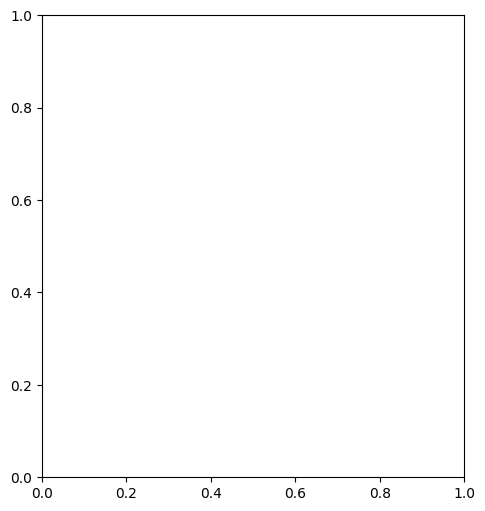

In [5]:
import pretty_midi
import matplotlib.pyplot as plt

def plot_piano_roll(midifile, color='b'):
    # Load MIDI file
    midi_data = pretty_midi.PrettyMIDI(midifile)

    # Create a piano roll representation
    piano_roll = midi_data.get_piano_roll()

    # Plot the piano roll
    plt.imshow(piano_roll, aspect='auto', cmap='gray', origin='lower', interpolation='none')
    plt.xlabel('Time')
    plt.ylabel('MIDI Note')
    plt.title('Piano Roll')
    plt.grid(True)

    # Highlight notes in the piano roll
    nonzero_notes = piano_roll.nonzero()
    plt.scatter(nonzero_notes[1], nonzero_notes[0], color=color, s=5, alpha=0.7) # x=timestamps, y=MIDI notes

# Paths to your MIDI files
midi_file1 = './../data/MAPS/ENSTDkCl/MUS/MAPS_MUS-bk_xmas1_ENSTDkCl.mid'
midi_file2 = './../probs/model_type=CCNN/'

# Plotting piano rolls of both MIDI files
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_piano_roll(midi_file1, color='r')
plt.title('First MIDI File')

plt.subplot(1, 2, 2)
plot_piano_roll(midi_file2, color='g')
plt.title('Second MIDI File')

plt.tight_layout()
plt.show()
